In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
wine_sales_data = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\wine_sales_data.csv', sep=',')

In [93]:
wine_sales_data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [94]:
vinho_verde = wine_sales_data[wine_sales_data.country == 'Portugal'].reset_index(drop=True)
vinho_verde = wine_sales_data[wine_sales_data.province == 'Vinho Verde'].reset_index(drop=True)
vinho_verde = vinho_verde[['description', 'points', 'price', 'variety', 'winery']]
vinho_verde

,description,points,price,variety,winery
0,"Pure Alvarinho from the Monção region, it's ri...",92,35.0,Alvarinho,Provam
1,"With its typical prickle on the tongue, this i...",85,10.0,Portuguese White,Caves Campelo
2,"Lightly spritzy, this tastes of crisp apple an...",85,9.0,Portuguese White,Caves Campelo
3,Some wood aging has rounded out this fruity wi...,91,NaN,Loureiro,Casal Paço Padreiro
4,This medium-sweet rosé is a familiar style of ...,84,10.0,Rosé,Caves Campelo
...,...,...,...,...,...
391,"A simple, rather earthy, dry style of vinho ve...",83,9.0,Portuguese White,Adega Cooperativa Ponte de Lima
392,The estate wine from Vila Verde which is in Lo...,82,8.0,Portuguese White,Casa de Vila Verde
393,"The standard style of inexpensive Vinho Verde,...",82,6.0,Portuguese White,Borges
394,"Very nice Vinho Verde, with fresh, green apple...",86,9.0,White Blend,Casa de Vila Verde


In [95]:
vinho_verde.dtypes

description     object
points           int64
price          float64
variety         object
winery          object
dtype: object

In [96]:
vinho_verde.describe().T

,count,mean,std,min,25%,50%,75%,max
points,396.0,86.409091,2.491366,80.0,85.0,86.0,88.0,92.0
price,310.0,11.400000,4.821205,5.0,8.0,10.0,13.0,45.0


In [97]:
vinho_verde.isna().sum()

description     0
points          0
price          86
variety         0
winery          0
dtype: int64

In [98]:
vinho_verde = vinho_verde.interpolate()
print(vinho_verde)

                                           description  points  price  \
0    Pure Alvarinho from the Monção region, it's ri...      92   35.0   
1    With its typical prickle on the tongue, this i...      85   10.0   
2    Lightly spritzy, this tastes of crisp apple an...      85    9.0   
3    Some wood aging has rounded out this fruity wi...      91    9.5   
4    This medium-sweet rosé is a familiar style of ...      84   10.0   
..                                                 ...     ...    ...   
391  A simple, rather earthy, dry style of vinho ve...      83    9.0   
392  The estate wine from Vila Verde which is in Lo...      82    8.0   
393  The standard style of inexpensive Vinho Verde,...      82    6.0   
394  Very nice Vinho Verde, with fresh, green apple...      86    9.0   
395  Pricey for a Vinho Verde, but one of the best ...      87   15.0   

              variety                           winery  
0           Alvarinho                           Provam  
1    Port

C:\Users\janin\AppData\Local\Temp\ipykernel_20916\4242603032.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  vinho_verde = vinho_verde.interpolate()


In [99]:
# Function to remove outliers based on IQR
def remove_price_outliers(df, price_column):
    # Calculate Q1, Q3, and IQR for the price column
    Q1 = df[price_column].quantile(0.25)
    Q3 = df[price_column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print statistics
    print(f"Original dataset size: {len(df)}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

    # Remove outliers
    df_cleaned = df[(df[price_column] >= lower_bound) & (df[price_column] <= upper_bound)]

    # Print statistics after removing outliers
    print(f"Dataset size after removing outliers: {len(df_cleaned)}")
    print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

    return df_cleaned

In [100]:
vinver = remove_price_outliers(vinho_verde, 'price')

Original dataset size: 396
Lower bound: 1.6874999999999991
Upper bound: 19.7875
Dataset size after removing outliers: 373
Number of outliers removed: 23


In [101]:
vinver

,description,points,price,variety,winery
1,"With its typical prickle on the tongue, this i...",85,10.0,Portuguese White,Caves Campelo
2,"Lightly spritzy, this tastes of crisp apple an...",85,9.0,Portuguese White,Caves Campelo
3,Some wood aging has rounded out this fruity wi...,91,9.5,Loureiro,Casal Paço Padreiro
4,This medium-sweet rosé is a familiar style of ...,84,10.0,Rosé,Caves Campelo
5,"Soft, light and fruity, this wine is ready for...",84,10.0,Portuguese White,Caves Campelo
...,...,...,...,...,...
391,"A simple, rather earthy, dry style of vinho ve...",83,9.0,Portuguese White,Adega Cooperativa Ponte de Lima
392,The estate wine from Vila Verde which is in Lo...,82,8.0,Portuguese White,Casa de Vila Verde
393,"The standard style of inexpensive Vinho Verde,...",82,6.0,Portuguese White,Borges
394,"Very nice Vinho Verde, with fresh, green apple...",86,9.0,White Blend,Casa de Vila Verde


In [102]:
vinver = vinver.dropna().reset_index()
vinver.drop('index', axis=1)

,description,points,price,variety,winery
0,"With its typical prickle on the tongue, this i...",85,10.0,Portuguese White,Caves Campelo
1,"Lightly spritzy, this tastes of crisp apple an...",85,9.0,Portuguese White,Caves Campelo
2,Some wood aging has rounded out this fruity wi...,91,9.5,Loureiro,Casal Paço Padreiro
3,This medium-sweet rosé is a familiar style of ...,84,10.0,Rosé,Caves Campelo
4,"Soft, light and fruity, this wine is ready for...",84,10.0,Portuguese White,Caves Campelo
...,...,...,...,...,...
368,"A simple, rather earthy, dry style of vinho ve...",83,9.0,Portuguese White,Adega Cooperativa Ponte de Lima
369,The estate wine from Vila Verde which is in Lo...,82,8.0,Portuguese White,Casa de Vila Verde
370,"The standard style of inexpensive Vinho Verde,...",82,6.0,Portuguese White,Borges
371,"Very nice Vinho Verde, with fresh, green apple...",86,9.0,White Blend,Casa de Vila Verde


In [103]:
# Convert the dictionary into DataFrame
vinver_new = pd.DataFrame(vinver)

# Get the unique values of 'B' column
vinver_new['variety'].unique()

array(['Portuguese White', 'Loureiro', 'Rosé', 'Portuguese Red',
       'Alvarinho', 'Arinto', 'Vinhão', 'Portuguese Rosé',
       'Portuguese Sparkling', 'Espadeiro', 'Avesso', 'Azal',
       'White Blend'], dtype=object)

In [104]:
white = ['Portuguese White', 'Alvarinho', 'Arinto', 'Loureiro', 'Avesso', 'Azal', 'White Blend']
white_wine = vinver[vinver['variety'].isin(white)]
white_wine.index = range(len(white_wine))
white_wine.drop('index', axis=1)


,description,points,price,variety,winery
0,"With its typical prickle on the tongue, this i...",85,10.0,Portuguese White,Caves Campelo
1,"Lightly spritzy, this tastes of crisp apple an...",85,9.0,Portuguese White,Caves Campelo
2,Some wood aging has rounded out this fruity wi...,91,9.5,Loureiro,Casal Paço Padreiro
3,"Soft, light and fruity, this wine is ready for...",84,10.0,Portuguese White,Caves Campelo
4,"Crisp, dry and fresh, this is a lively and fru...",88,12.0,Portuguese White,Casa de Vila Nova
...,...,...,...,...,...
309,"A simple, rather earthy, dry style of vinho ve...",83,9.0,Portuguese White,Adega Cooperativa Ponte de Lima
310,The estate wine from Vila Verde which is in Lo...,82,8.0,Portuguese White,Casa de Vila Verde
311,"The standard style of inexpensive Vinho Verde,...",82,6.0,Portuguese White,Borges
312,"Very nice Vinho Verde, with fresh, green apple...",86,9.0,White Blend,Casa de Vila Verde


In [86]:
red = ['Portuguese Red', 'Vinhão']
red_wine = vinver_new[vinver_new['variety'].isin(red)]
red_wine.index = range(len(red_wine))
red_wine.drop('index', axis=1)

,description,points,price,variety,winery
0,"High-acid red wine is not for everyone, but th...",84,10.000000,Portuguese Red,Caves Campelo
1,A wood-aged red Vinho Verde brings out some ri...,88,10.666667,Vinhão,Casal Paço Padreiro
2,"Tight with shocking acidity, this wine confirm...",82,10.000000,Portuguese Red,Campelo
3,This lightly sparkling red is earthy and tense...,85,13.000000,Portuguese Red,Adega de Monção
4,"Tight with shocking acidity, this wine confirm...",82,10.000000,Portuguese Red,Campelo
5,"They say red Vinho Verde is an acquired taste,...",83,5.000000,Portuguese Red,Campelo
6,The Vinhão's red juice gives this rosé its ora...,84,10.500000,Vinhão,Casal Paço Padreiro
7,This biodynamic estate produces an amazingly i...,88,17.000000,Portuguese Red,Casal Paço Padreiro
8,This lightly sparkling red is earthy and tense...,85,16.333333,Portuguese Red,Adega de Monção
9,Oak aging gives richness to this red Vinho Ver...,89,8.200000,Vinhão,Casal Paço Padreiro


In [87]:
rose = ['Rosé', 'Portuguese Rosé']
rose_wine = vinver_new[vinver_new['variety'].isin(rose)]
rose_wine.index = range(len(rose_wine))
rose_wine.drop('index', axis=1)

,description,points,price,variety,winery
0,This medium-sweet rosé is a familiar style of ...,84,10.000000,Rosé,Caves Campelo
1,"This wine is fresh, with plenty of acidity. It...",83,9.000000,Rosé,Adega Cooperativa Ponte de Barca
2,"Zesty and tongue prickling, this is fresh, fru...",83,8.000000,Rosé,Mapreco
3,A sweet rosé that is light and fresh from the ...,84,12.000000,Rosé,Quintas de Melgaço
4,"Soft and sweet, this is a light and fruity win...",82,10.000000,Rosé,Campelo
5,"Bright pink in color, a caramel flavor resting...",85,14.000000,Rosé,Casa do Valle
6,"Along with its strawberry flavors, this wine i...",83,7.000000,Rosé,Adega Cooperativa Ponte de Barca
7,Aromas of strawberry sherbet are followed by s...,80,8.000000,Rosé,Viniverde
8,The Vinho Verde rosé style takes advantage of ...,85,10.000000,Rosé,Casa do Valle
9,"Sweet, frothy and very pink, this is a strawbe...",83,8.666667,Rosé,Quinta das Arcas


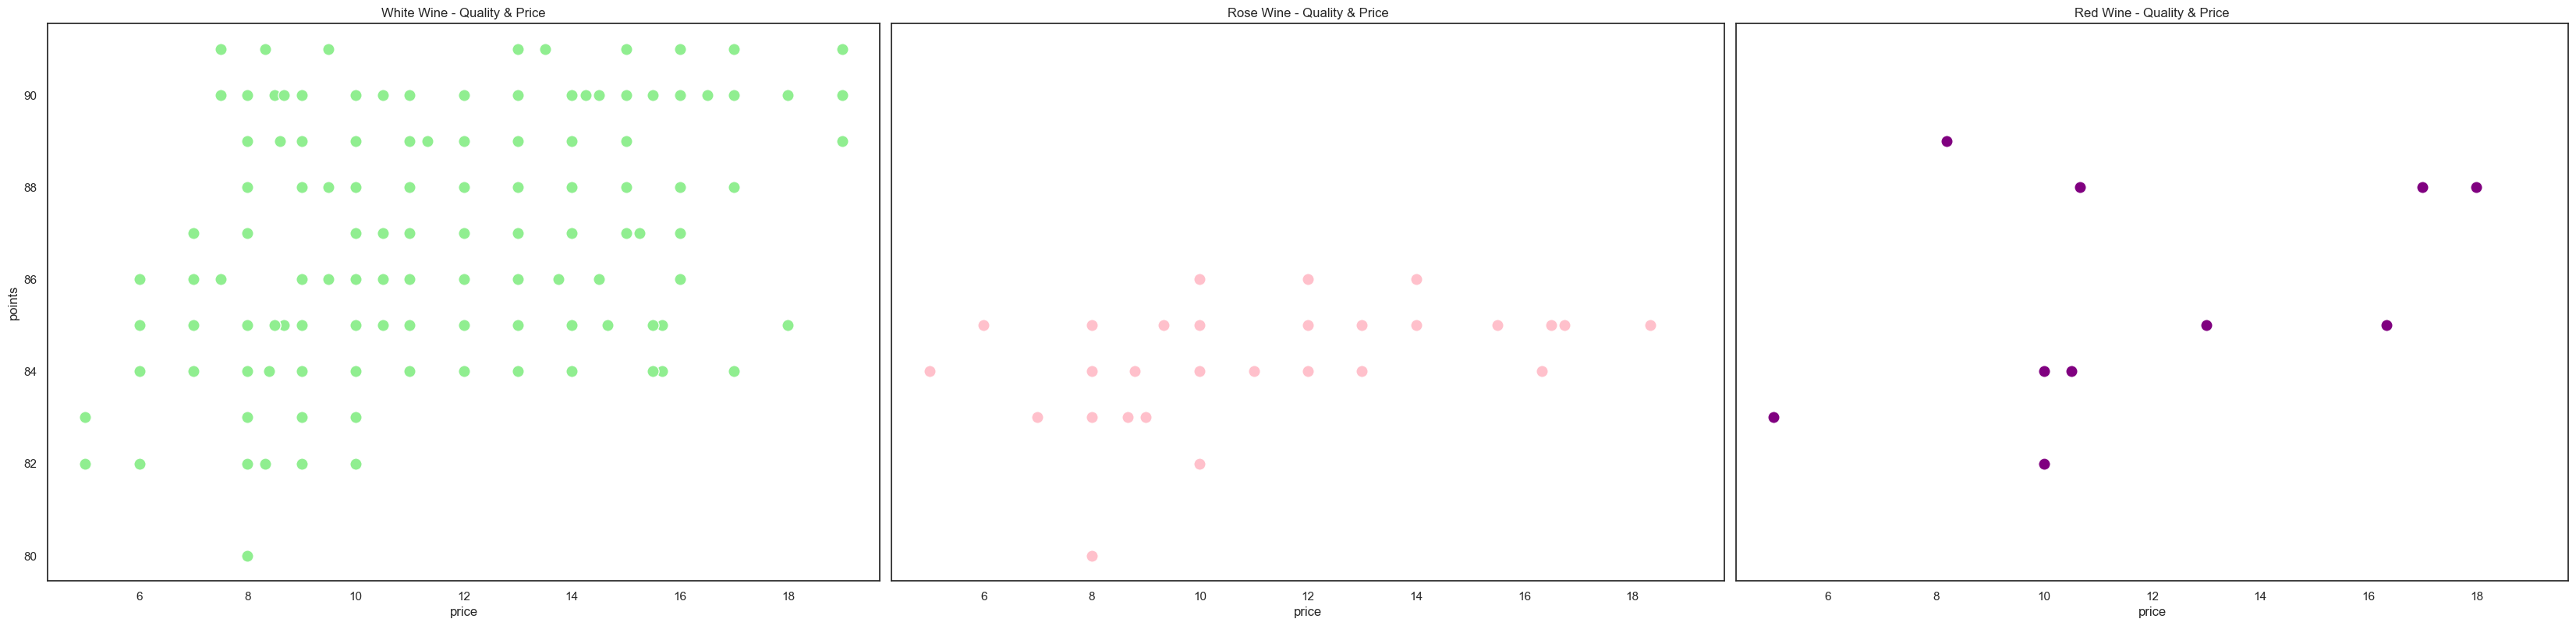

In [88]:
sns.set_theme(style="white")
fig, axes = plt.subplots(nrows =1, ncols=3,figsize=(33,8),sharey=True, sharex=True)


sns.scatterplot(x = 'price', y = 'points', color='lightgreen', ax=axes[0], data=white_wine, s=120).set_title("White Wine - Quality & Price")
sns.scatterplot(x = 'price', y = 'points', color='pink', ax=axes[1], data=rose_wine, s=120).set_title("Rose Wine - Quality & Price")
sns.scatterplot(x = 'price', y = 'points', color='purple', ax=axes[2], data=red_wine, s=120).set_title("Red Wine - Quality & Price")

plt.tight_layout(pad=0.5, w_pad=0.9, h_pad=5.0)

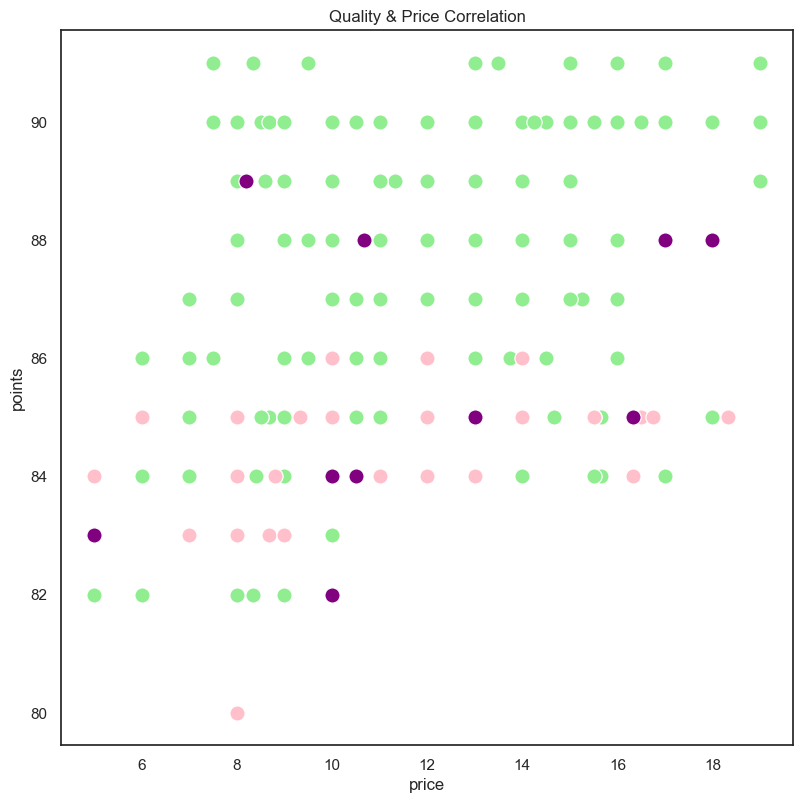

In [89]:
sns.set_theme(style="white")
fig, axes = plt.subplots(nrows =1, ncols=1,figsize=(8,8), sharey=True, sharex=True)

sns.scatterplot(x = 'price', y = 'points', color='lightgreen', data=white_wine, s=120).set_title("Quality & Price Correlation") 
sns.scatterplot(x = 'price', y = 'points', color='pink', data=rose_wine, s=120).set_title("Quality & Price Correlation") 
sns.scatterplot(x = 'price', y = 'points', color='purple', data=red_wine, s=120).set_title("Quality & Price Correlation") 
plt.tight_layout(pad=0.5, w_pad=0.9, h_pad=5.0)